# LU-Zerlegung für Tridiagonalmatrizen

## Theorie und Ziele

Für *Tridiagonalmatrizen* lässt sich die *LU-Zerlegung* effizienter durchführen, als für vollbesetzte Matrizen. Solche Matrizen treten bei der numerischen Lösung von eindimensionalen Randwertproblemen (RWP) auf. Wir betrachten exemplarisch 

$$
     u''(x) = f(x), \quad (0 < x < 1), \qquad u(0) = u_0, u(1) = u_n
$$

für vorgegebene Randwerte $u_0, u_n$. Durch **Diskretisierung** lässt sich daraus ein LGS mit tridiagonaler Koeffizentenmatrix $A$ für die Stützwerte $u_i = u(x_i)$ gewinnen. Wir teilen dazu das Intervall $[0,1]$ in $n$ Intervalle der Länge $h>0$ an den Teilungspunkten $x_0 = 0, x_1 = x_0 + h, \ldots, x_n = 1$. Daraus entsteht ein tridiagonales LGS $A u = b$ (s. Unterricht).

**Ziel** des Praktikums ist es, die Algorithmen für Tridiagonalmatrizen zu implementieren und an einem Beispiel zu testen. Obwohl $A$ für die hier betrachtete Problemklasse immer gleich aussieht ($2$ auf der Hauptdiagonalen, $-1$ auf den zwei Nebendiagonalen) soll die LU-Zerlegung allgemein für Tridiagonalmatrizen umgesetzt werden.

Da fast alle Einträge in $A$ verschwinden, wird die Matrix $A$ nicht als Matrix gespeichert, sondern nur die drei Diagonalen als Vektoren. *Eine* Möglichkeit besteht darin, eine $3 \times n$ Matrix zu verwenden (aber es gibt natürlich viele andere Varianten):

$$
        M = \begin{pmatrix} 0      & a_{21} & \ldots & a_{n-1,n-2} & a_{n,n-1} \\
                            a_{11} & a_{22} & \ldots &  a_{n-1,n-1} & a_{nn} \\
                            a_{12} & a_{23} & \ldots &  a_{n-1,n} & 0 \end{pmatrix}
$$

in diesem Fall gilt 

$$
 a_{j,j-1} = m_{1,j}, (2 \leq j \leq n) \qquad a_{j,j} = m_{2,j}, (1 \leq j \leq n)\qquad a_{j,j+1} = m_{3,j} , (1 \leq j \leq n-1)
$$

in Python ist zusätzlich zu berücksichtigen, dass die Indices bei $0$ starten. Das Resultat der Zerlegung ist ebenfalls tridiagonal und kann auf dieselbe Art gespeichert werden.

## Aufgaben

### Aufgabe 1

Implementieren Sie die LU-Zerlegung effizient für Tridiagonalmatrizen (Algorithmus 2.6). Sie dürfen die Schnittstelle anpassen, wenn Sie das sinnvoll finden.

In [1]:
import numpy as np
"""
LU decomposition for tridiagonal matrix
in: a  =  [[0,      a_{21}, ..., a_{n-1,n-2}, a_{n,n-1}],
           [a_{11}, a_{22}, ..., a_{n-1,n-1}, a_{nn}],
           [a_{12}, a_{23}, ..., a_{n-1,n},   0]]

out: LU = [[0,      l_{21}, ..., l_{n-1,n-2}, l_{n,n-1}],
           [r_{11}, r_{22}, ..., r_{n-1,n-1}, r_{nn}],
           [r_{12}, r_{23}, ..., r_{n-1,n},   0]]
"""
def LUT(ATri):
    n = ATri.shape[1]
    LU = ATri.copy()
    for j in range(1,n):
        LU[0,j] = ATri[0,j]/LU[1,j-1]
        LU[1,j] = ATri[1,j]-LU[0,j]*LU[2,j-1]
    return LU



#Testcode:
#Atest = np.array([[0,-1,-1,-1],[2,2,2,2],[-1,-1,-1,0]],dtype=float)
#luTriTest = LUT(Atest)
#print(Atest)
#print(luTriTest)



Testen Sie Ihre Umsetzung. Der folgende Testcode funktioniert, falls die Tridiagonalmatrix wie in der Einleitung beschrieben gespeichert wurde.

In [2]:
import numpy as np
n=5 # Grösse der Matrizen
# test LUT
for k in range(1000):
    m = np.random.rand(3,n)     # Zufällige Matrix M erzeugen
    m[0][0], m[-1][-1] = 0, 0   # nicht verwendete Einträge löschen
    A = np.diag(m[0][1:], k=-1) + np.diag(m[1], k=0) + np.diag(m[2][:-1], k=1) # volle Matrix A erzeugen (nur für Test)
    
    LU = LUT(m)
    
    L,U = np.diag(LU[0][1:] , k=-1)+ np.identity(n), np.diag(LU[1], k=0) + np.diag(LU[2][:-1], k=1) # L, U Matrizen
    assert(np.linalg.norm(L@U-A) < 1e-10)

### Aufgabe 2

Implementieren Sie die Vorwärts- und Rücksubstitution effizient für Tridiagonalmatrizen

In [3]:
"""
in: LU (output from LUT), vector b
out: vector x s.t. L@U@x == b
"""  

def fbSubsT(LR,b):
    #forwardSubs
    n = len(b)
    y = np.zeros(n,dtype=float)
    for i in range(n):
        y[i] = b[i] - LR[0,i]*y[i-1]
    #backwardSubs
    x = np.zeros(n,dtype=float)
    x[n-1] = y[n-1]/LR[1,n-1]
    for i in range(n-2, -1, -1):
        x[i] = (y[i] - LR[2,i]*x[(i+1)])/LR[1,i]
    return x


#bTest = np.array([1,2,3,4],dtype=float)
#xTest = fbSubsT(luTriTest,bTest)
#print(xTest)

Testen Sie Ihre Umsetzung. Der folgende Testcode ist wiederum auf die oben beschriebene Speicherung der Matrizen ausgelegt.

In [4]:
# test fbSubsT
for k in range(1):
    m = np.random.rand(3,n) 
    m[0][0], m[-1][-1] = 0, 0
    A = np.diag(m[0][1:], k=-1) + np.diag(m[1], k=0) + np.diag(m[2][:-1], k=1)
    
    x1 = np.random.rand(n,1)    # Lösungsvektor
    b = A@x1                    # rechte Seite des LGS

    LU = LUT(m)
    x2 = fbSubsT(LU, b)
    
    assert(np.linalg.norm(x1.T-x2) < 1e-10)

### Aufgabe 3

Wenden Sie die oben implementierten Algorithmen auf das in der Einleitung genannte RWP an, plotten Sie die numerische Lösung zusammen mit der exakten Lösung. Die tridiagonale Matrix des LGS ist nun gegeben durch die finite Differenzen Diskretisierung (Beispiel 2.6 im Skript).

In [5]:
n = 5
x = np.linspace(0,1,n+1)

In [6]:
# Dirichlet Randwerte
u0 = 0
un = 0

In [7]:
# System Matrix
A = np.zeros((3,n-1))
A[0,1:] = -1
A[1,:] = 2
A[2,:-1] = -1

Im Beispiel benutzen wir $f(x) = 1$.

In [8]:
# Rechte Seite
h = 1./n
b = np.array(np.square(h)*np.ones(n-1),dtype=float)
b[0] = np.square(h)
b[-1] = np.square(h)

Lösung berechnen und visualisieren:

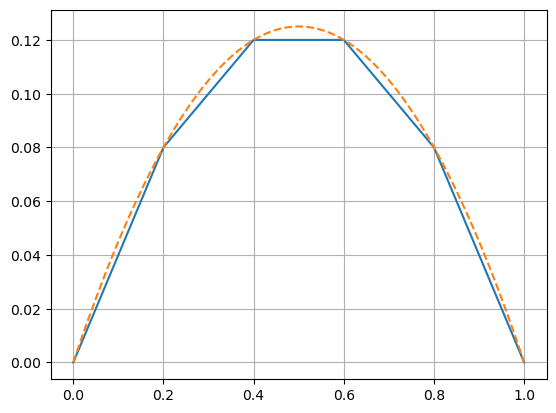

In [9]:
import matplotlib.pyplot as plt

LU = LUT(A)
u = np.zeros((n+1))
u[0] = u0;   # Randwert links
u[-1] = un;  # Randwert rechts
u[1:-1] = fbSubsT(LU, b)

n_analytisch = 100
x_analytisch = np.linspace(0,1,n_analytisch+1)
ue = -0.5*x_analytisch*(x_analytisch-1); # Loesung von u''(x) = 1, u(0) = u(1) = 0

plt.plot(x, u)
plt.plot(x_analytisch, ue,'--')
plt.grid()
plt.show()

### Abgabe

- Aufgabe 1: Funktion zur Berechnung der LU-Zerlegung für tridiagonal Matrizen
- Aufgabe 2: Funktion zum Lösen des Gleichungssystem mittels Vorwärts- / Rückwärtseinsetzen
- Aufgabe 3: Anwendung auf ein eindimensionales Randwertproblem

Kurzer Bericht mit den Ergebnisse und python Code als Textfile.